In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Read in Dataframe
cat = pd.read_excel("TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
outcomes = pd.read_excel("TRAIN/TRAINING_SOLUTIONS.XLSX")

In [9]:
cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [10]:
outcomes.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [33]:
# Join dataframes
df = pd.merge(cat, outcomes, on='participant_id')

# Female dataframe
dfFemale = df[df['Sex_F'] == 1]

# Male dataframe
dfMale = df[df['Sex_F'] == 0]


In [13]:
dfFemale.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'ADHD_Outcome', 'Sex_F'],
      dtype='object')

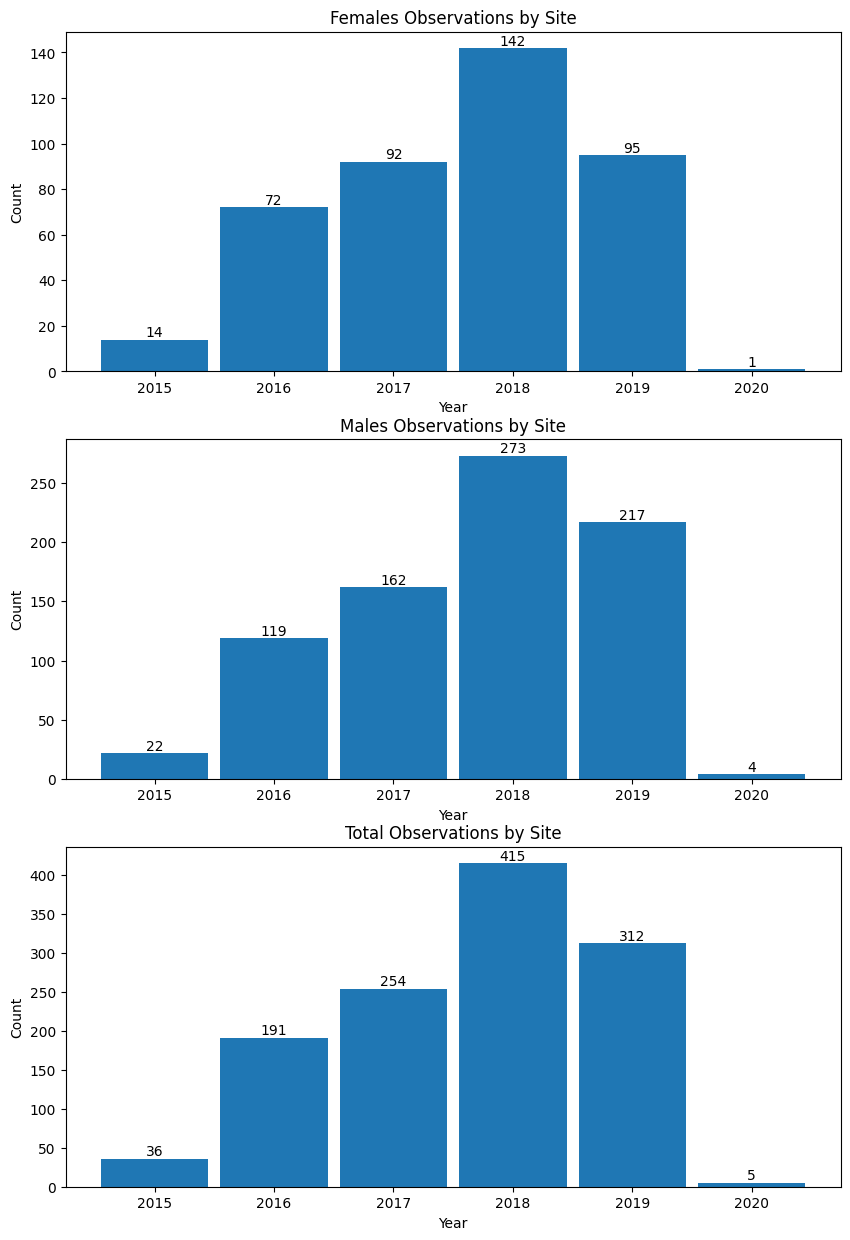

In [66]:
# Observations by year 
fig, axes = plt.subplots(3,1,figsize=(10,15))

years = sorted(df['Basic_Demos_Enroll_Year'].unique())


# Females
values, bins, bars = axes[0].hist(dfFemale['Basic_Demos_Enroll_Year'], align='mid', rwidth=0.9, bins=np.arange(min(years), max(years)+2)-0.5)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].set_title('Females Observations by Site')
axes[0].bar_label(bars, fontsize=10)

# Males
values, bins, bars = axes[1].hist(dfMale['Basic_Demos_Enroll_Year'], align='mid', rwidth=0.9, bins=np.arange(min(years), max(years)+2)-0.5)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].set_title('Males Observations by Site')
axes[1].bar_label(bars, fontsize=10)

# Total
values, bins, bars = axes[2].hist(df['Basic_Demos_Enroll_Year'], align='mid', rwidth=0.9, bins=np.arange(min(years), max(years)+2)-0.5)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Count')
axes[2].set_title('Total Observations by Site')
axes[2].bar_label(bars, fontsize=10)


plt.show()

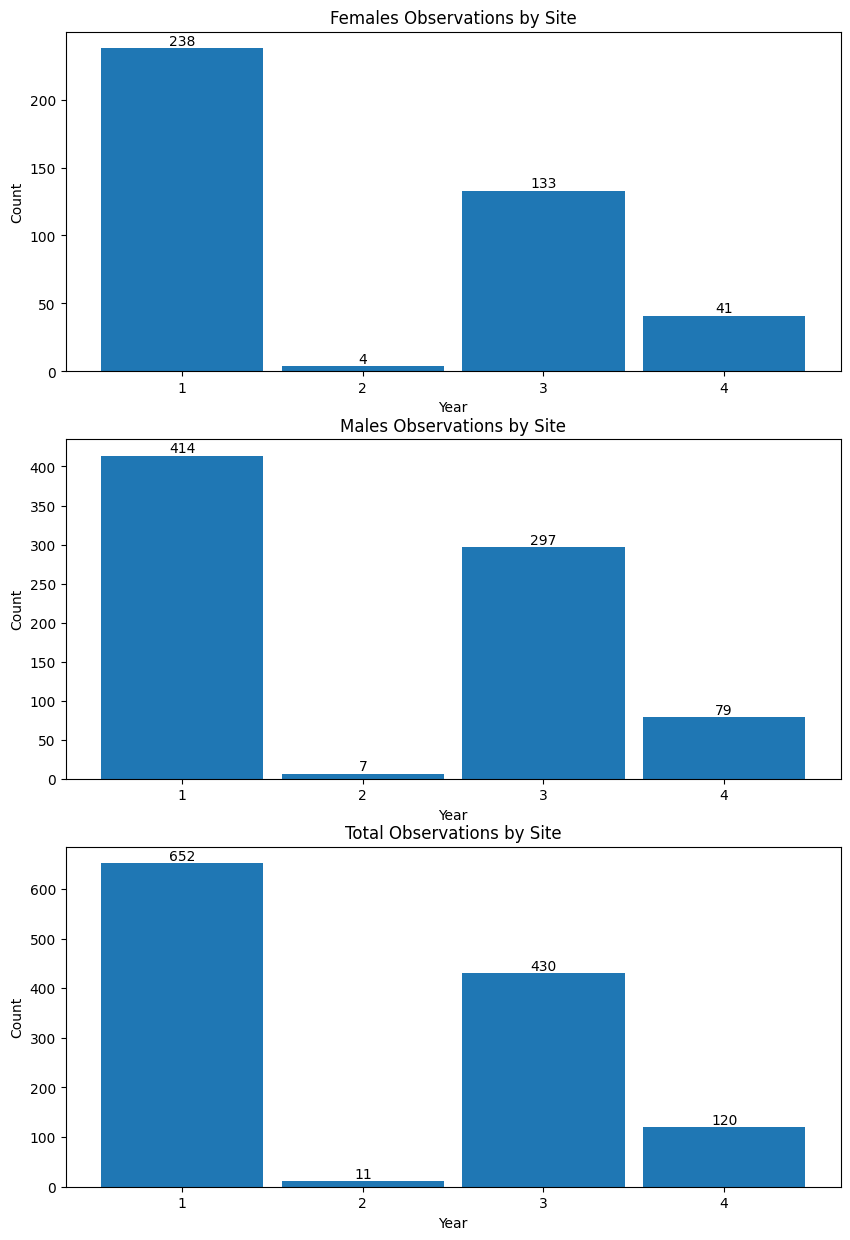

In [68]:
# Observations by year 
fig, axes = plt.subplots(3,1,figsize=(10,15))

years = sorted(df['Basic_Demos_Study_Site'].unique())


# Females
values, bins, bars = axes[0].hist(dfFemale['Basic_Demos_Study_Site'], align='mid', rwidth=0.9, bins=np.arange(min(years), max(years)+2)-0.5)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].set_title('Females Observations by Site')
axes[0].bar_label(bars, fontsize=10)
axes[0].set_xticks([1,2,3,4])
axes[0].set_xticklabels(['1', '2', '3', '4'])

# Males
values, bins, bars = axes[1].hist(dfMale['Basic_Demos_Study_Site'], align='mid', rwidth=0.9, bins=np.arange(min(years), max(years)+2)-0.5)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].set_title('Males Observations by Site')
axes[1].bar_label(bars, fontsize=10)
axes[1].set_xticks([1,2,3,4])
axes[1].set_xticklabels(['1', '2', '3', '4'])


# Total
values, bins, bars = axes[2].hist(df['Basic_Demos_Study_Site'], align='mid', rwidth=0.9, bins=np.arange(min(years), max(years)+2)-0.5)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Count')
axes[2].set_title('Total Observations by Site')
axes[2].bar_label(bars, fontsize=10)
axes[2].set_xticks([1,2,3,4])
axes[2].set_xticklabels(['1', '2', '3', '4'])

plt.show()



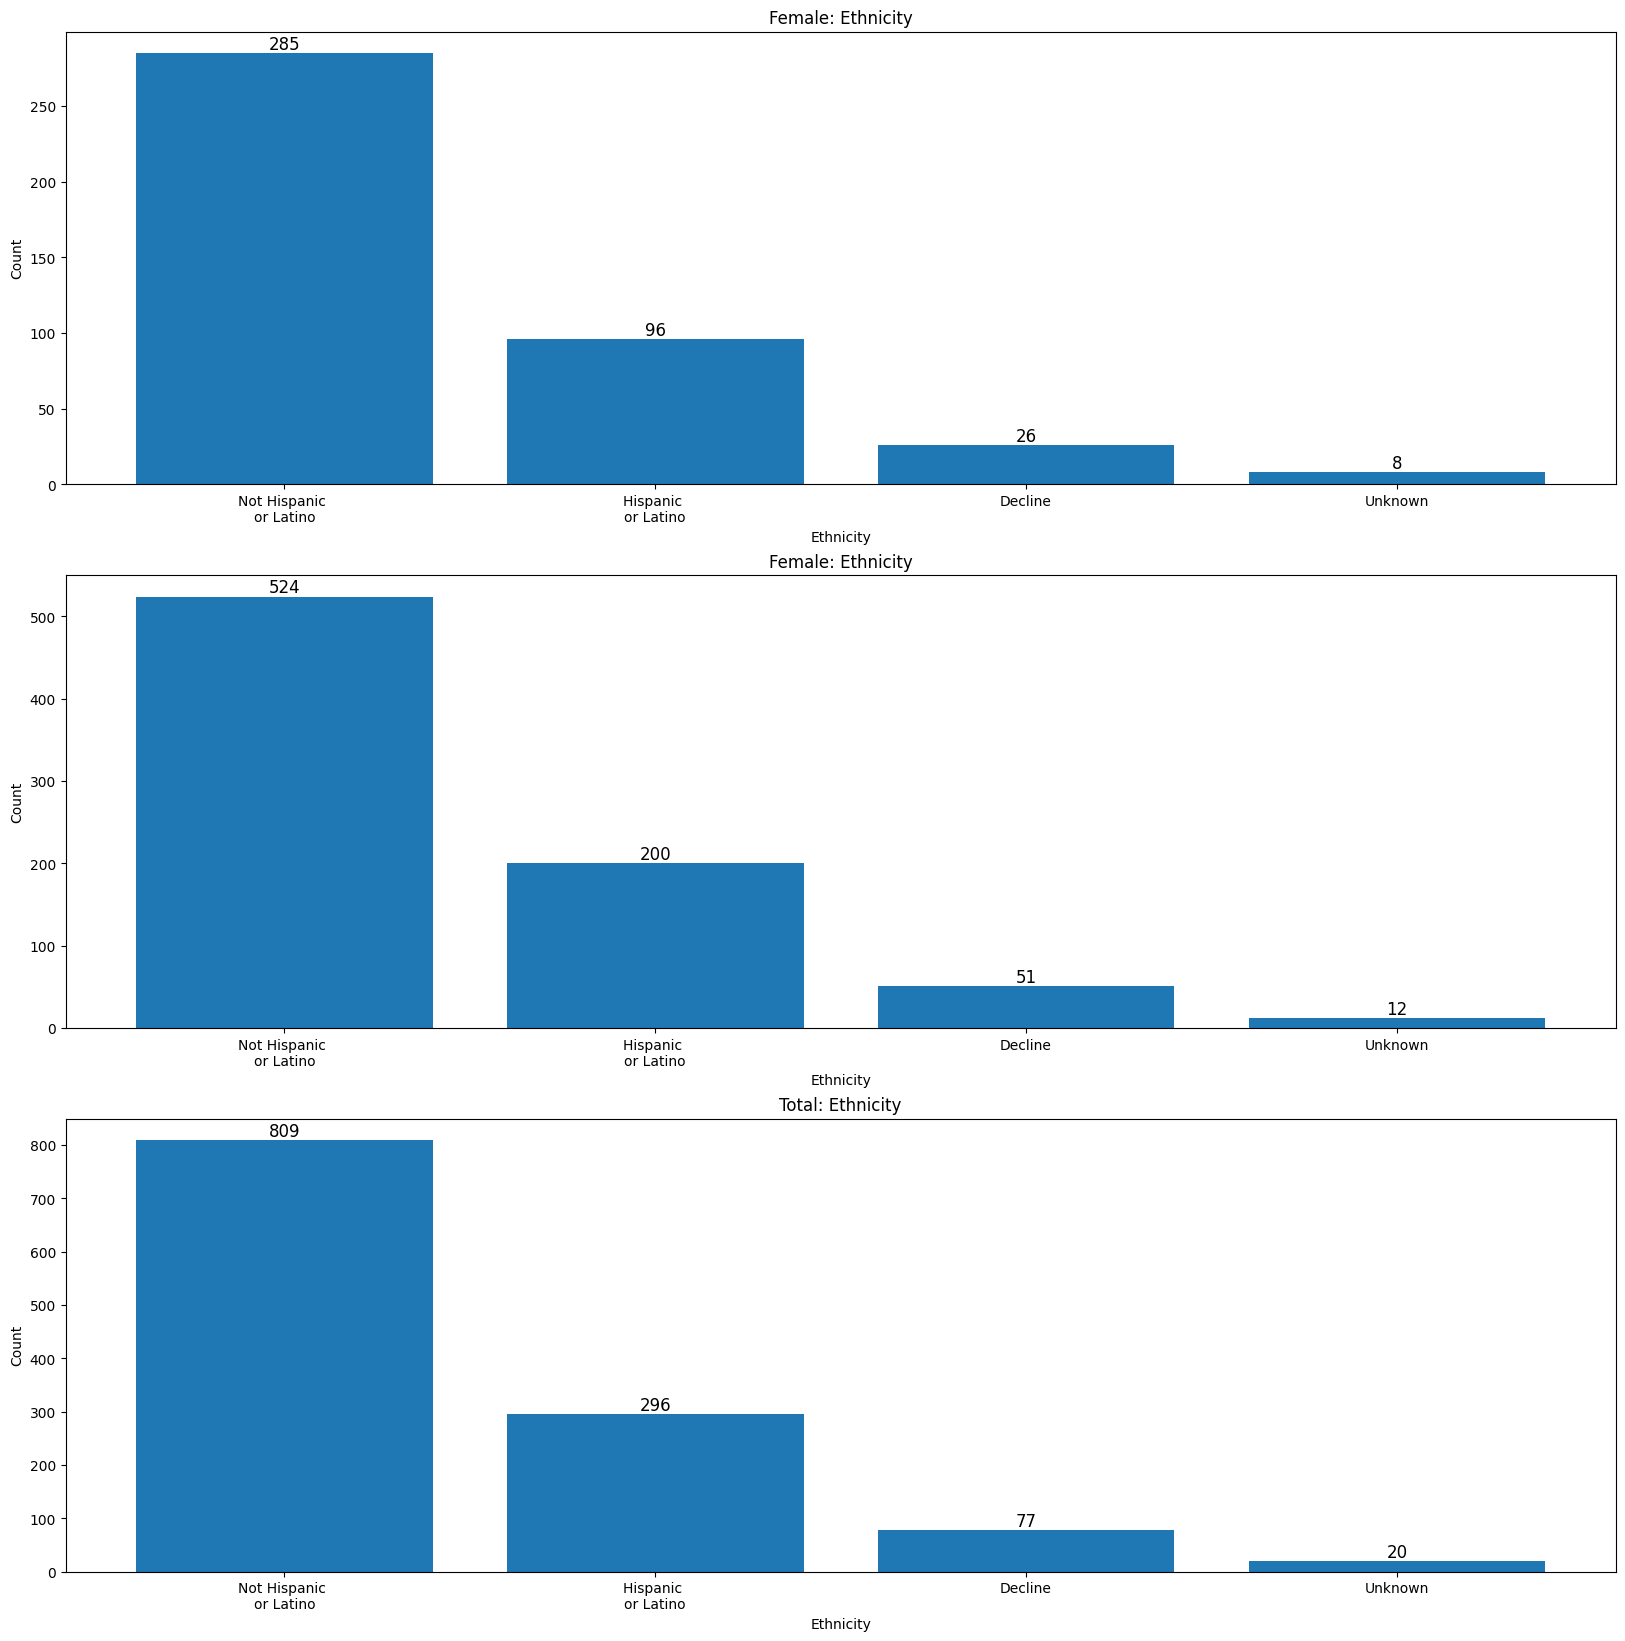

In [83]:
# Ethnicity
fig, axes = plt.subplots(3,1, figsize=(20,20))

new_labels = ['Not Hispanic \nor Latino', 'Hispanic \nor Latino', 'Decline', 'Unknown']

# Females
value_counts = dfFemale['PreInt_Demos_Fam_Child_Ethnicity'].value_counts()

bars = axes[0].bar(value_counts.index, value_counts.values, align='center')

axes[0].set_xticks(ticks=range(len(value_counts.index)),labels=new_labels)
axes[0].set_title('Female: Ethnicity')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Ethnicity')
axes[0].bar_label(bars, fontsize=12)

# Males
value_counts = dfMale['PreInt_Demos_Fam_Child_Ethnicity'].value_counts()

bars = axes[1].bar(value_counts.index, value_counts.values, align='center')

axes[1].set_xticks(ticks=range(len(value_counts.index)),labels=new_labels)
axes[1].set_title('Female: Ethnicity')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Ethnicity')
axes[1].bar_label(bars, fontsize=12)

# Total
value_counts = df['PreInt_Demos_Fam_Child_Ethnicity'].value_counts()

bars = axes[2].bar(value_counts.index, value_counts.values, align='center')

axes[2].set_xticks(ticks=range(len(value_counts.index)),labels=new_labels)
axes[2].set_title('Total: Ethnicity')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Ethnicity')
axes[2].bar_label(bars, fontsize=12)


plt.show()


In [10]:
dfFemale['PreInt_Demos_Fam_Child_Race'].value_counts()

PreInt_Demos_Fam_Child_Race
0     224
8      68
1      56
2      38
3      11
9       7
4       6
10      3
11      2
7       1
Name: count, dtype: int64

/var/folders/38/fmz8f8ss6q94l4c_wt_pj9800000gn/T/ipykernel_20211/2725072945.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFemale['PreInt_Demos_Fam_Child_Race'] = df['PreInt_Demos_Fam_Child_Race'].map(label_map)


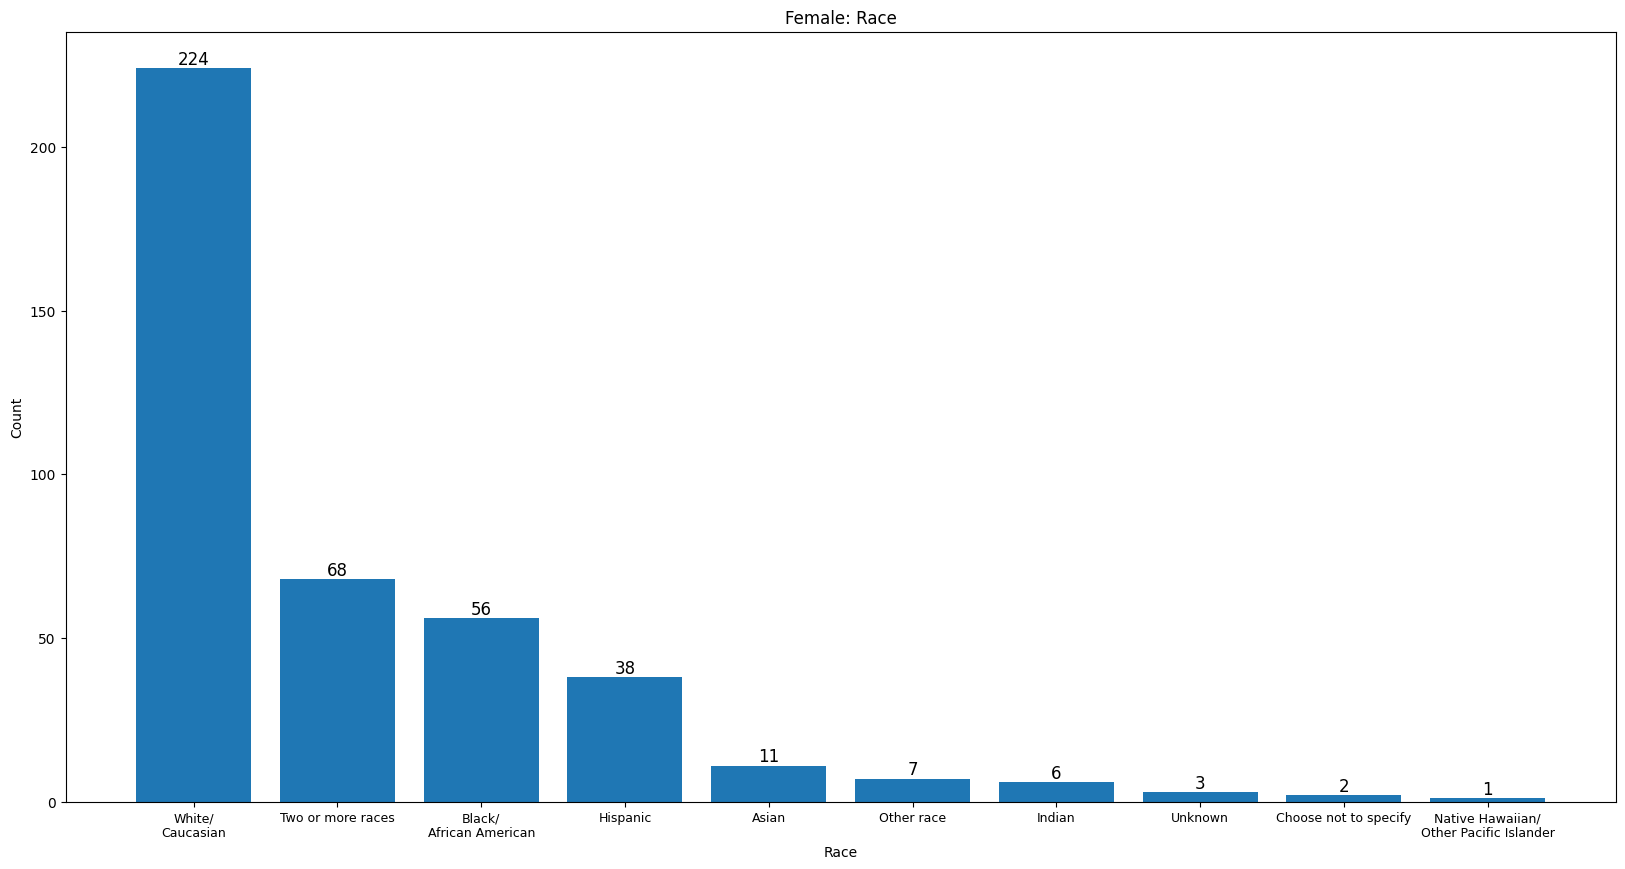

In [98]:
# Females: Race

# Labels
label_map = {
    0: 'White/\nCaucasian', 
    8: 'Two or more races', 
    1: 'Black/\nAfrican American', 
    2: 'Hispanic', 
    3: 'Asian', 
    9: 'Other race', 
    4: 'Indian', 
    10: 'Unknown', 
    11: 'Choose not to specify', 
    7: 'Native Hawaiian/\nOther Pacific Islander'
}
new_labels = [label_map.get(i, i) for i in value_counts.index]
dfFemale['PreInt_Demos_Fam_Child_Race'] = df['PreInt_Demos_Fam_Child_Race'].map(label_map)

value_counts = dfFemale['PreInt_Demos_Fam_Child_Race'].value_counts()

plt.figure(figsize=(20,10))
bars = plt.bar(value_counts.index, value_counts.values)
plt.bar_label(bars, fontsize=12)
plt.xticks(ticks=range(len(value_counts.index)),labels=new_labels, fontsize=9)
plt.title('Female: Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.show()

In [91]:
dfMale['PreInt_Demos_Fam_Child_Race'].unique()

array([ 2,  8,  0,  3,  9,  1,  7, 11, 10,  4])

/var/folders/38/fmz8f8ss6q94l4c_wt_pj9800000gn/T/ipykernel_20211/2138767757.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMale['PreInt_Demos_Fam_Child_Race'] = df['PreInt_Demos_Fam_Child_Race'].map(label_map)


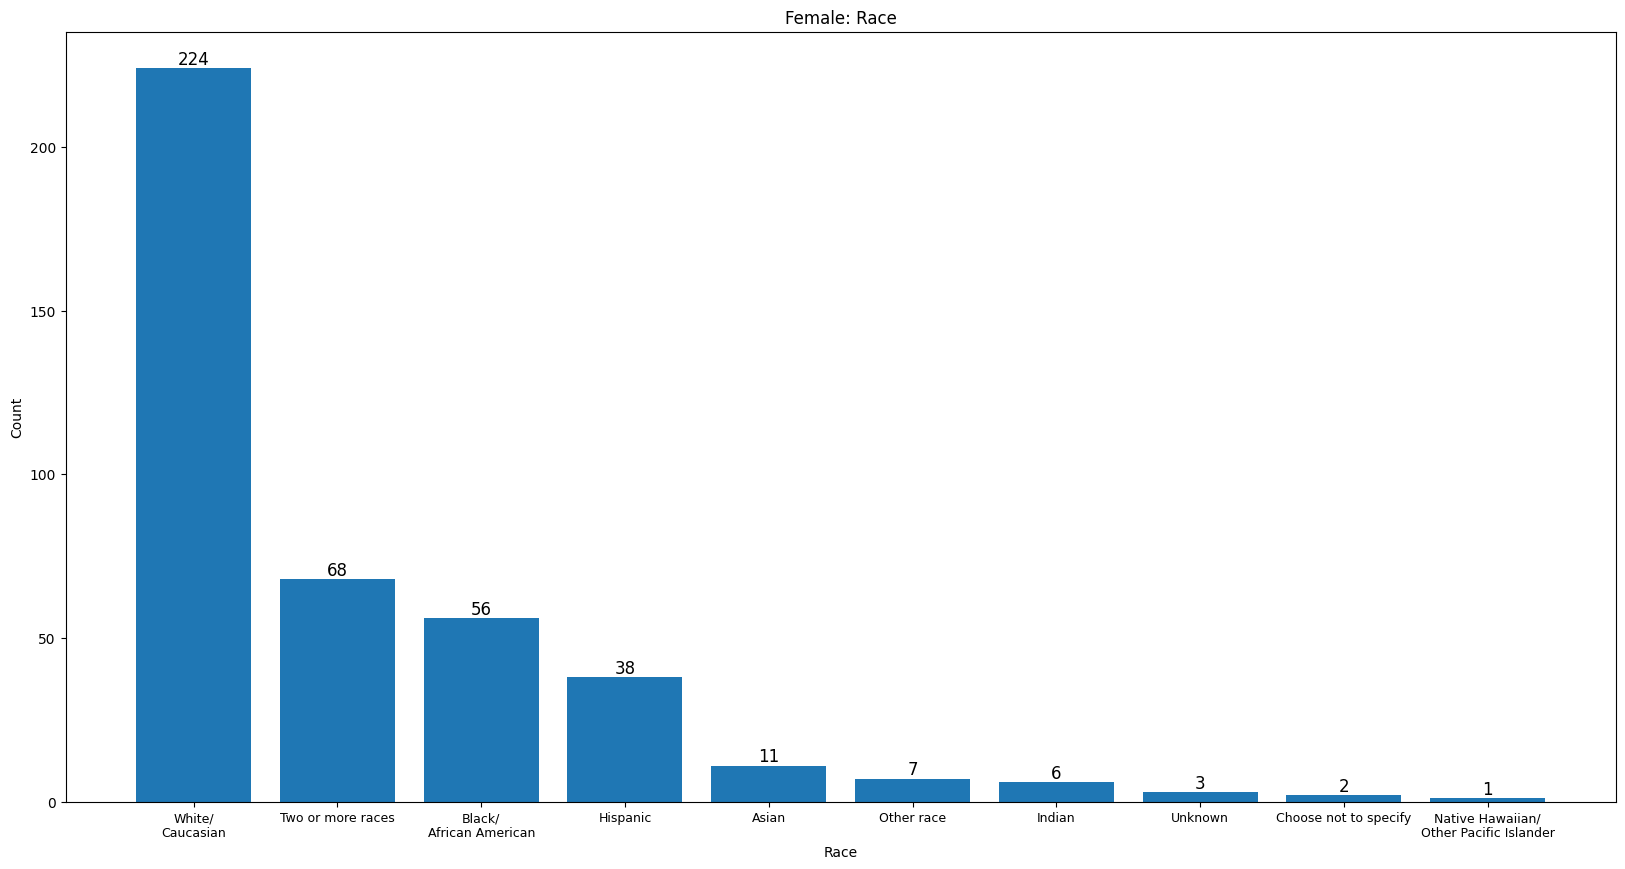

In [ ]:
# Males: Race

# Labels
label_map = {
    0: 'White/\nCaucasian', 
    8: 'Two or more races', 
    1: 'Black/\nAfrican American', 
    2: 'Hispanic', 
    3: 'Asian', 
    9: 'Other race', 
    4: 'Indian', 
    10: 'Unknown', 
    11: 'Choose not to specify', 
    7: 'Native Hawaiian/\nOther Pacific Islander'
}
new_labels = [label_map.get(i, i) for i in value_counts.index]
dfMale['PreInt_Demos_Fam_Child_Race'] = dfMale['PreInt_Demos_Fam_Child_Race'].map(label_map)

value_counts = dfFemale['PreInt_Demos_Fam_Child_Race'].value_counts()

plt.figure(figsize=(20,10))
bars = plt.bar(value_counts.index, value_counts.values)
plt.bar_label(bars, fontsize=12)
plt.xticks(ticks=range(len(value_counts.index)),labels=new_labels, fontsize=9)
plt.title('Male: Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.show()